# Cardano USD (ADA-USD)

## Datos
### Cargue de datos
Los datos los utilizados para este estudio, se encuentra en linea en el siguiente link: "https://raw.githubusercontent.com/lihkir/Uninorte/main/AppliedStatisticMS/DataVisualizationRPython/Lectures/Python/PythonDataSets/ADA-USD.csv". Por lo que se procede a importar los datos con el siguiente código.

In [1]:
import pandas as pd
# Cargar los datos desde el archivo CSV
url = "https://raw.githubusercontent.com/lihkir/Uninorte/main/AppliedStatisticMS/DataVisualizationRPython/Lectures/Python/PythonDataSets/ADA-USD.csv"
df = pd.read_csv(url) #Asignamos una variable para leer los datos
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-10-01,0.021678,0.032226,0.017354,0.024969,0.024969,50068700.0
1,2017-10-02,0.024607,0.030088,0.019969,0.025932,0.025932,57641300.0
2,2017-10-03,0.025757,0.027425,0.020690,0.020816,0.020816,16997800.0
3,2017-10-04,0.020864,0.022806,0.020864,0.021931,0.021931,9000050.0
4,2017-10-05,0.021951,0.022154,0.020859,0.021489,0.021489,5562510.0


### Organización de datos
Dado que los datos obtenidos tiene una columan de fechas pero no tienen el formato correspondiente, se procede a cambiar este formato.


In [2]:
# Convertir la columna de fechas a un formato de fecha
df['Date'] = pd.to_datetime(df['Date'])

## Visualización de datos 
### Candlestick
Se visualiza los datos medicante un gráfico tipo Candlestick, también conocido como gráfico de velas, ya que se está analizando datos financieros con un período de tiempo y muestra la apertura, el cierre, el máximo y el mínimo de un activo financiero. De esta forma, es una herramienta esencial en el análisis financiero.



c:\Users\Sandra\anaconda3\envs\tarea1_venv\lib\site-packages\mplfinance\_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


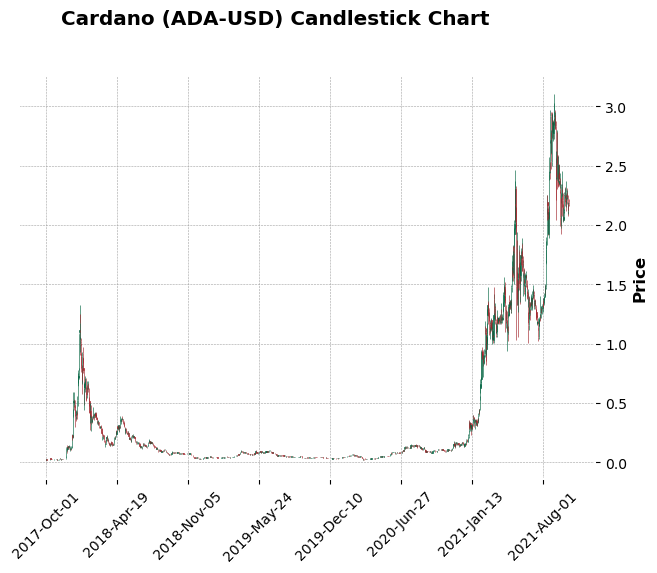

In [6]:
# Crear un gráfico de candlestick
import mplfinance as mpf
import matplotlib.pyplot as plt

mpf.plot(df.set_index('Date'), type='candle', style='charles', title="Cardano (ADA-USD) Candlestick Chart")
plt.show()

In [6]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x = df['Date'],
                                     open = df['Open'], 
                                     high = df['High'],
                                     low = df['Low'], 
                                     close = df['Close'])
                     ])
fig.update_layout(
    title="Ethereum USD (ETH-USD)",
    xaxis_title="Day",
    yaxis_title="ETH-USD",
    font=dict(
        family="Courier New, monospace",
        size=12,
        color="RebeccaPurple"
    )
)
fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()

En este gráfico se puede evidenciar datos por fecha, donde cada vela muestra el precio de apertura, el precio de cierre, el precio más alto y el precio más bajo durante este período específico. Si el cuerpo de la vela es verde, significa que los precios subieron durante ese período, y si es rojo, bajaron. Las mechas arriba y abajo de la vela dicen cuánto variaron los precios. Podemos usar estos gráficos para detectar tendencias y patrones que pueden ser de ayuda en la toma decisiones de inversión.

## EDA
Hacemos un analisis exploratorio para examinar el conjunto de datos de forma preliminar y para resumir sus características principales, identificar patrones, detectar valores atípicos y entender su estructura antes de realizar análisis o modelado más avanzado. Involucra la visualización de datos, cálculo de estadísticas descriptivas y la búsqueda de relaciones o tendencias para obtener una comprensión inicial de la información contenida en los datos. Para esto, ejecutamos el siguiente código.

```PowerShell
pip install sweetviz
```

In [7]:
import sweetviz as sv
report = sv.analyze(df)
report.show_html('report.html') # Generar un informe HTML

                                             |          | [  0%]   00:00 -> (? left)

c:\Users\Sandra\anaconda3\envs\tarea1_venv\lib\site-packages\sweetviz\from_profiling_pandas.py:65: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(keys):


Report report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### Generalidades
Podemos revisar todos los datos de forma conjunta para tener una visión integral de la información que se está manejando

#### Datos
Del Dataframe podemos evidenciar que tenemos 7 variables, 6 de ellad corresponden a variables de tipo numerico y sólo una de ellas corresponde a texto. Esto tiene sentido, ya que esta última corresponde a "Date" que son las fechas de cada uno de los datos. Mientras que las demas variables si indican un medición puntual. 

#### Correlación
Por otro lado, podemos evidenciar que casi todas las variables estudiadas presenta una alta correlación entre ellas, a excepcion del volumen que demuestra un poco menos de correlación con las demás variables. Esto puede dar indicios de variables que se pueden excluir de un posible estudio dado que unas representan el comportamiento de la otra. 
A manera de un ejemplo especifico tenemos la variable "Open" que se encuentra fuertemente correlacionada con las variables "High", "Low", "Close", "Adj Close". Pero se encuentra un poco menos correlacionada con la variable "Volume". Esto se evidencia en el siguiente gráfico.


![image](assets/Imagen4.png)
<p style="text-align: center; width: 100%;">Figura 1. Gráfico de correlación</p>

### Variables
Se revisan los datos registrados en cada una de las variables

![image](assets/Imagen5.png)
<p style="text-align: center; width: 100%;">Figura 2. Análisis exploratorio de variables</p>

#### Open
Se puede evidenciar que el valor más alto y más bajo de la variable "Open" corresponde a 2.97 y 0.03 respectivamente. Asimismo, que el 95% de
los datos para esta variable tienen un valor igual o inferior a 1.76, lo que supone que hay pocos valores con un valor
superior a este. Por otro lado, el valor promedio en promedio de los datos es 0.37.
Estos estadísticos resumen la distribución de la variable "Open", lo que te permite comprender la gama e intevalo de valores que toma [0.03 , 2.97], la tendencia central (promedio:0.37 y mediana:0.09) y la posición relativa de ciertos percentiles clave en la distribución de datos. 

#### High
Los resultados muestran que la variable "High" tiene un rango que va desde 0.02 hasta 3.10, con la mayoría de 
los datos (el 95%) por debajo de 1.87, indicando una concentración de valores más bajos. El valor promedio de la 
variable es aproximadamente 0.39. 

#### Low
En cuanto a los estadísticos de la variable "Low", el valor máximo es 2.91, que representa el punto más  alto de los datos, mientras que el valor mínimo es 0.02, que es el punto más bajo registrado. El valor 95% es 1.63, lo que indica que el 95% de los datos son igual o inferiores a este valor, proporcionando una comprensión  de la mayoría de los datos. El tercer cuartil (Q3) es 0.28, lo que significa que el 75% de los datos tienen un valor igual o inferior a este número. El promedio (AVG) es 0.35, representando el valor típico de la variable. La mediana es 0.09, lo que implica que el 50% de los datos son igual o inferiores a este valor. El valor 5% es 0.03, lo que señala que solo el 5% de los datos superan este umbral y lo que nos puede dar indicios de valores atípicos o muy bajos en la distribución. 

#### Close y Adj close
Con respecto a la variable "Close" y la variable "Adj close", el valor más alto alcanza 2.97,mientras que el más bajo es 0,02. La mayoría de los datos (el 95%) se encuentra por debajo de 1.78, que es el valor 95%. El tercer cuartil (Q3) se ubica en 0.30, lo que significa que el 75% de los datos son igual o más bajos. El valor promedio (AVG) es 0.38 y la mediana está en 0.09, lo que indica que la mitad de los datos son menores a este valor. El valor 5% es 0.03, lo que podría señalar valores atípicos o muy bajos. Estos datos nos ayudan a entender cómo se distribuye estás variables. Cabe resaltar que los datos obtenidos en ambas variables son iguales, lo que podría señalar alguna información sobre correlación. Esto se sustenta con el gráfico de correlacion donde vemos que estás dos variables tienen una alta correlación.

#### Volumen
Los datos muestran que el valor máximo de volumen alcanza 19.1 mil millones. Además, el 95% de los datos se encuentra por debajo de 6.0 mil millones, lo que significa que la mayoría de las observaciones tienen un volumen menor. El tercer cuartil (Q3) está en 0.7  mil millones, lo que indica que el 75% de los datos tienen un volumen igual o menor. El promedio (AVG) es de 1.1 mil millones, y la mediana es de 0.1 mil millones, lo que sugiere  que la mitad de los datos tienen un volumen igual o menor a este valor. El primer cuartil (Q1)  es 0.1 mil millones, y el valor 5% es 0.00 mil millones, lo que podría indicar que hay algunas  observaciones con volúmenes muy bajos. En resumen, estos estadísticos nos dan una idea de cómo  se distribuye el volumen, con la mayoría de los valores por debajo de 6.0 mil millones y un rango que va desde 0.00 mil millones hasta 19.1 mil millones.
